/tmp/ipykernel_2223577/3365708730.py:176: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


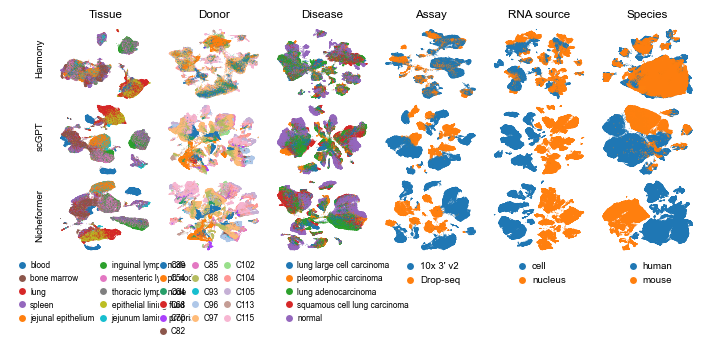

In [5]:
# -*- coding: utf-8 -*-
# Create time: 2025-11-09
# Update time: 2025-11-27

# conda activate benchmark
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scanpy as sc
import matplotlib as mpl
plt.rcParams['svg.fonttype'] = 'none'
sc._settings.settings._vector_friendly=True # 这个设置可以让umap的点为图片，但是分辨率很低，需要跟jpg结合使用

save_path = "/home/wanglinting/scFM/Result/figure"
os.makedirs(save_path, exist_ok=True)


# 模型配置：每个模型包含 title、col_name 和 legend_title
model_configs = {
    # "Immune": {"title": "Immune (tissue)", "col_name": "tissue", "legend_title": "Tissue"},
    # "liver": {"title": "Liver (donor)", "col_name": "donor_id", "legend_title": "Donor"},
    # "HLCA_disease": {"title": "HLCA (disease)", "col_name": "disease", "legend_title": "Disease"},
    # "HLCA_assay": {"title": "HLCA (assay)", "col_name": "assay", "legend_title": "Assay"},
    # "HLCA_sn": {"title": "HLCA (RNA source)", "col_name": "suspension_type", "legend_title": "RNA source"},
    # "limb": {"title": "Limb (species)", "col_name": "organism", "legend_title": "Species"},
    "Immune": {"title": "Tissue", "col_name": "tissue", "legend_title": "Tissue"},
    "liver": {"title": "Donor", "col_name": "donor_id", "legend_title": "Donor"},
    "HLCA_disease": {"title": "Disease", "col_name": "disease", "legend_title": "Disease"},
    "HLCA_assay": {"title": "Assay", "col_name": "assay", "legend_title": "Assay"},
    "HLCA_sn": {"title": "RNA source", "col_name": "suspension_type", "legend_title": "RNA source"},
    "limb": {"title": "Species", "col_name": "organism", "legend_title": "Species"},
}


# 全局字体设置
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7

# 布局参数
cm2in = 1/2.54
ncols, nrows = 6, 4  # 6 列（UMAP），4 行（UMAP + 图例）

fig = plt.figure(figsize=(21 * cm2in, 10 * cm2in))
gs = gridspec.GridSpec(nrows, ncols, figure=fig, hspace=0, wspace=0.1)

# 绘制 UMAP
methods = list(model_configs.items())
for idx, (model_name, config) in enumerate(methods):
    
    adata = sc.read(f"/home/wanglinting/scFM/Result/{model_name}/harmony/Embeddings_harmony.h5ad", backed='r')

    # UMAP 图在第一行
    ax_umap = fig.add_subplot(gs[0, idx])

    sc.pl.umap(
        adata,
        color=config["col_name"],
        show=False,
        ax=ax_umap,
        legend_loc=None,
        frameon=False,
        title=config["title"],
        s=1
    )
    
    adata = sc.read(f"/home/wanglinting/scFM/Result/{model_name}/scgpt/Embeddings_scgpt.h5ad", backed='r')

    # UMAP 图在第一行
    ax_umap = fig.add_subplot(gs[1, idx])

    sc.pl.umap(
        adata,
        color=config["col_name"],
        show=False,
        ax=ax_umap,
        legend_loc=None,
        frameon=False,
        title="",
        s=1
    )

    adata = sc.read(f"/home/wanglinting/scFM/Result/{model_name}/nicheformer/Embeddings_nicheformer.h5ad", backed='r')

    # UMAP 图在第二行
    ax_umap = fig.add_subplot(gs[2, idx])

    sc.pl.umap(
        adata,
        color=config["col_name"],
        show=False,
        ax=ax_umap,
        legend_loc=None,
        frameon=False,
        title="",
        s=1
    )

    # print(adata)

    # 图例在第三行
    ax_legend = fig.add_subplot(gs[3, idx])
    ax_legend.axis("off")
    
    # 获取颜色信息
    categories = adata.obs[config["col_name"]].cat.categories
    if f"{config['col_name']}_colors" in adata.uns:
        colors = adata.uns[f"{config['col_name']}_colors"]
    else:
        # 如果没有预定义颜色，使用默认颜色
        print(f"Warning: No predefined colors for {config['col_name']} in {model_name}. Using default colors.")
        import matplotlib.cm as cm
        colors = cm.tab20(range(len(categories)))
    
    palette = dict(zip(categories, colors))

    # 图例分列
    if len(palette) > 10:
        ncol_legend = 3
    elif len(palette) > 5:
        ncol_legend = 2
    else:
        ncol_legend = 1
    # 图例文字大小
    fontsize = 6 if len(palette) > 4 else 7
    # 图例位置
    if model_name == "liver":
        legend_loc = "upper right"
    elif model_name == "HLCA_disease":
        legend_loc = "upper left"
    else:
        legend_loc = "upper center"

    # 自定义图例顺序（如果需要）
    if model_name == "Immune":
        legend_order = ["blood", "bone marrow", "lung", "spleen", "jejunal epithelium", "inguinal lymph node", "mesenteric lymph node", "thoracic lymph node", "epithelial lining fluid", "jejunum lamina propria"]
        # 过滤 palette，只保留 legend_order 中的项（确保顺序和存在性）
        palette = {k: v for k, v in palette.items() if k in legend_order}
        # 按照 legend_order 排序
        ordered_keys = legend_order
    else:
        ordered_keys = list(palette.keys())

    # 构造图例
    handles = [
        plt.Line2D(
            [0], [0], 
            marker="o", 
            color="w", 
            markerfacecolor=palette[key], 
            markersize=6,
            linestyle=""
        ) 
        for key in ordered_keys
    ]
    labels = ordered_keys
    
    ax_legend.legend(
        handles, labels,
        loc=legend_loc,
        frameon=False,
        ncol=ncol_legend,
        # title=config["legend_title"],
        title="",
        fontsize=fontsize,
        title_fontsize=7,
        handletextpad=0.02,
        columnspacing=0.05,
    )


# 在左侧添加行标签
fig.text(0.1, 0.8, "Harmony", ha='left', va='center', rotation=90, fontsize=7)
fig.text(0.1, 0.6, "scGPT", ha='left', va='center', rotation=90, fontsize=7)
fig.text(0.1, 0.4, "Nicheformer", ha='left', va='center', rotation=90, fontsize=7)

plt.tight_layout()
plt.savefig(f"{save_path}/Figure2A_umap.jpg", dpi=600, bbox_inches="tight")
plt.savefig(f"{save_path}/Figure2A_umap.pdf", dpi=600, bbox_inches="tight")
plt.savefig(f"{save_path}/Figure2A_umap.svg", dpi=600, bbox_inches="tight")
plt.show()
